## subset mur data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import os
import re
import xarray as xr
import glob

folder_path = '/Volumes/external/satellitedata/MUR/data/'

# Define the latitude and longitude range for the subset
lat_min, lat_max = -15, 15
lon_min, lon_max = -180, -110

# Get all NetCDF files in the folder
nc_files = glob.glob(os.path.join(folder_path, '*.nc'))

for file_path in nc_files:
    print(f'Processing {file_path}...')

    mur_df = xr.open_dataset(file_path)

    # Subset the data based on the defined latitude and longitude range
    subset = mur_df.where((mur_df.lat >= lat_min) & (mur_df.lat <= lat_max), drop=True)
    subset = subset.where((mur_df.lon >= lon_min) & (mur_df.lon <= lon_max), drop=True)

    subset_filename = os.path.basename(file_path).replace('.nc', '_subset.nc')
    subset_path = os.path.join(folder_path, 'subset',subset_filename)
    subset.to_netcdf(subset_path)

    mur_df.close()

    print(f'Subset saved to {subset_path}')

print('All subsets have been saved.')


## Plot mur data

In [5]:
import os
import glob
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
import os
import re
import xarray as xr
import glob

nc_files = sorted(glob.glob('/Volumes/external/satellitedata/MUR/data/subset/motive/*.nc'))

for nc_file in nc_files:
    subset = xr.open_dataset(nc_file)
    sst_date = pd.to_datetime(subset.time.values[0])

    plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    contour = plt.contourf(
        subset['lon'], subset['lat'], subset['analysed_sst'].squeeze() - 273.15,
        levels=100, cmap='coolwarm', transform=ccrs.PlateCarree(), vmin=23, vmax=28
    )


    ax.set_ylim(-2, 7)
    ax.set_xlim(-155, -125)

    plt.title(f"{sst_date.strftime('%Y-%m-%d')} MUR SST")
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    plt.colorbar(contour, label='SST (°C)', orientation='vertical')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.savefig(f"/Volumes/external/satellitedata/MUR/data/subset/motive/figures/MUR_{sst_date.strftime('%Y%m%d')}_ship.png", dpi=300)
    plt.close()



/var/folders/kp/k4k3ytr53rb5v8r9c02hm7ch0000gn/T/ipykernel_16693/792104513.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')
/var/folders/kp/k4k3ytr53rb5v8r9c02hm7ch0000gn/T/ipykernel_16693/792104513.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')
/var/folders/kp/k4k3ytr53rb5v8r9c02hm7ch0000gn/T/ipykernel_16693/792104513.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left')
/var/folders/kp/k4k3ytr53rb5v8r9c02hm7ch0000gn/T/ipykernel_16693/792104513.py:39: UserWarning: No artists with labels found to put in legend.  Note tha

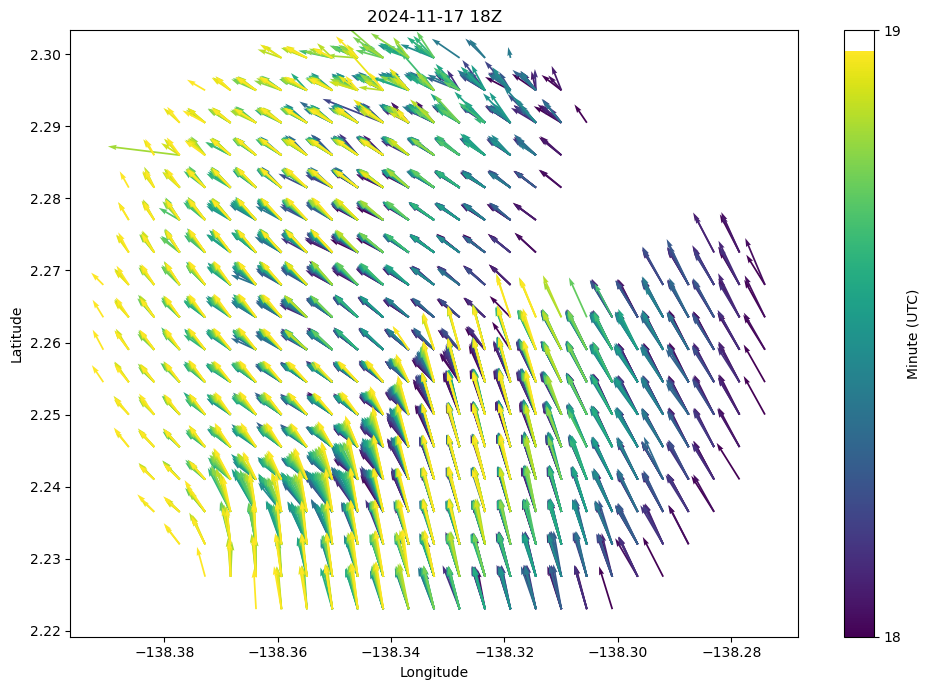

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

# Load dataset
ds = xr.open_dataset('/Volumes/external/MOTIVE/xband/skq_2024-11-17-18_currents.nc')
ds = ds.set_coords("time")

# Extract variables
u = ds.eastward_sea_water_velocity
v = ds.northward_sea_water_velocity
lon = ds.longitude
lat = ds.latitude
time = ds.time

# Convert time to hour (e.g., 18.5 for 18:30)
hours = xr.apply_ufunc(
    lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute / 60.0,
    time
)

# Broadcast hours to match shape of u/v
hour_2d = hours.broadcast_like(u)

# Colormap
cmap = plt.cm.viridis

# Set up plot
fig, ax = plt.subplots(figsize=(10, 7))
q = ax.quiver(lon, lat, u, v, hour_2d, cmap=cmap, scale=10, angles="xy")

# Colorbar setup
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=hour_2d.min(), vmax=hour_2d.max()), cmap=cmap)
cbar = fig.colorbar(sm, ax=ax, label="Minute")

# Format ticks like "18Z"
ticks = np.arange(np.floor(hour_2d.min()), np.ceil(hour_2d.max()) + .1)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{int(t):02d}" for t in ticks])

# Labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title(pd.to_datetime(ds.time.values[0]).strftime('%Y-%m-%d %HZ'))

plt.tight_layout()
plt.show()


nc_files = sorted(glob.glob('/Volumes/external/satellitedata/MUR/data/subset/motive/*.nc'))

for nc_file in nc_files:
    subset = xr.open_dataset(nc_file)
    sst_date = pd.to_datetime(subset.time.values[0])

    plt.figure(figsize=(14, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    contour = plt.contourf(
        subset['lon'], subset['lat'], subset['analysed_sst'].squeeze() - 273.15,
        levels=100, cmap='coolwarm', transform=ccrs.PlateCarree(), vmin=23, vmax=28
    )


    ax.set_ylim(-2, 7)
    ax.set_xlim(-155, -125)

    plt.title(f"{sst_date.strftime('%Y-%m-%d')} MUR SST")
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    plt.colorbar(contour, label='SST (°C)', orientation='vertical')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.savefig(f"/Volumes/external/satellitedata/MUR/data/subset/motive/figures/MUR_{sst_date.strftime('%Y%m%d')}_ship.png", dpi=300)
    plt.close()


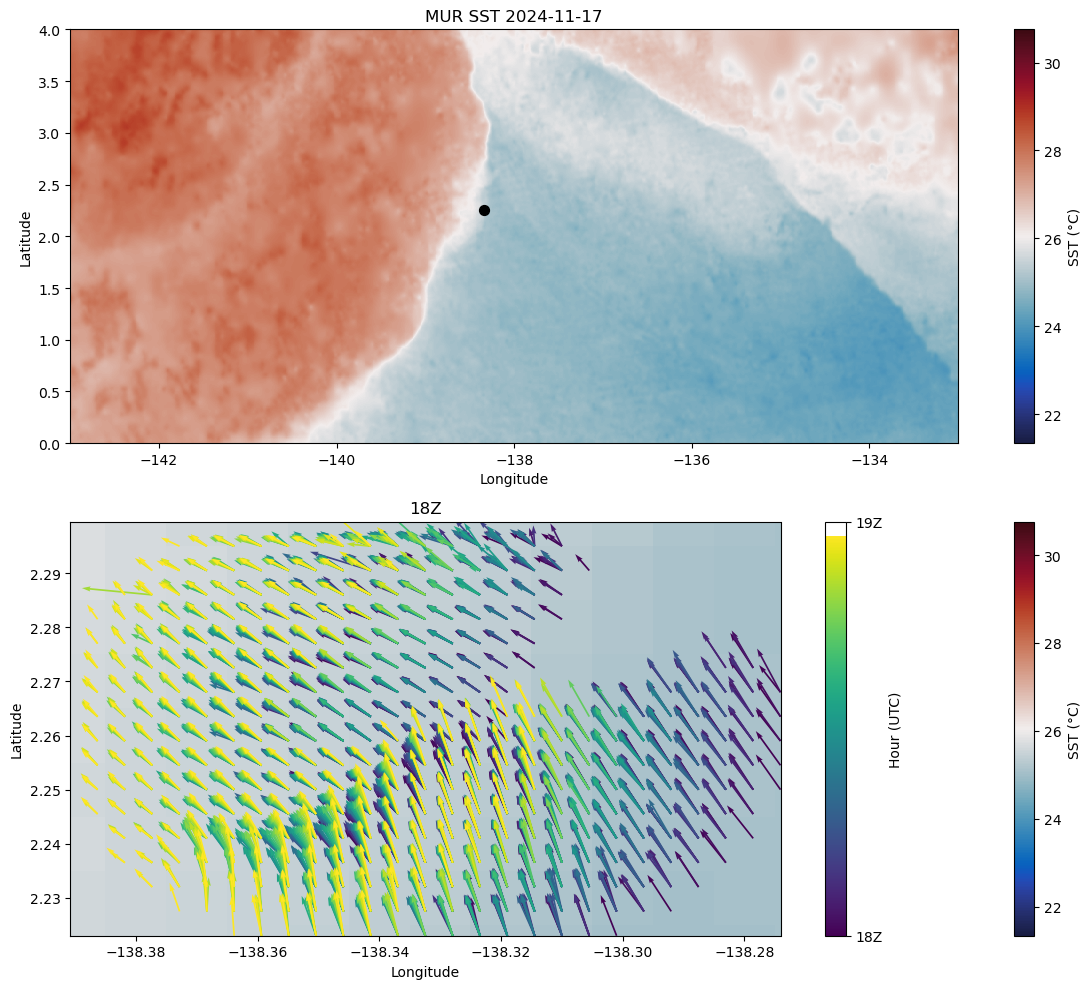

In [6]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cmocean

# loop through every xband file in this path like: 
xband_path = '/Volumes/external/MOTIVE/xband/skq_2024-11-17-18_currents.nc'
ds_xband = xr.open_dataset(xband_path)
ds_xband = ds_xband.set_coords("time")

# Extract date and hour from first time value
xband_time = pd.to_datetime(ds_xband.time.values[0])
xband_date = xband_time.strftime('%Y%m%d')
xband_hour = xband_time.hour

# === Find closest MUR SST file ===
mur_dir = '/Volumes/external/MOTIVE/mur_subset/'
mur_files = sorted(glob.glob(os.path.join(mur_dir, '*.nc')))

# Load time info from filenames
mur_times = []
for f in mur_files:
    basename = os.path.basename(f)
    try:
        date_str = basename[:8]
        time_obj = pd.to_datetime(date_str, format='%Y%m%d')
        mur_times.append((time_obj, f))
    except Exception:
        continue

# Find closest file in time
closest_file = min(mur_times, key=lambda t: abs(t[0] - xband_time))[1]
ds_mur = xr.open_dataset(closest_file)

# === Prep X-band data ===
u = ds_xband.eastward_sea_water_velocity
v = ds_xband.northward_sea_water_velocity
lon = ds_xband.longitude
lat = ds_xband.latitude

# Extract hours for colormap (broadcast to match u/v shape)
hours = xr.apply_ufunc(lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute / 60.0, ds_xband.time)
hour_2d = hours.broadcast_like(u)

# === Plotting ===
fig, ax = plt.subplots(2,1,figsize=(12, 10))

# Plot MUR SST
sst = ds_mur.analysed_sst - 273.15  # Kelvin to Celsius if needed
sst.plot(ax=ax[0], cmap=cmocean.cm.balance, cbar_kwargs={'label': 'SST (°C)'})

# Overlay X-band currents
q = ax[0].scatter(np.nanmean(lon), np.nanmean(lat),s=50,color='black')

ax[0].set_ylim(0,4)
ax[0].set_xlim(-143,-133)

ax[0].set_title(f"MUR SST {(pd.to_datetime(ds_mur.time.values.item()) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')}")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")




# ZOOM in - xband currents
sst.plot(ax=ax[1], cmap=cmocean.cm.balance, cbar_kwargs={'label': 'SST (°C)'})

q = ax[1].quiver(lon, lat, u, v, hour_2d, cmap='viridis', scale=10)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=hour_2d.min(), vmax=hour_2d.max()), cmap='viridis')
cbar = fig.colorbar(sm, ax=ax[1], label="Hour (UTC)")
ticks = np.arange(np.floor(hour_2d.min()), np.ceil(hour_2d.max()) + 1)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{int(t):02d}Z" for t in ticks])

ax[1].set_title(f"{pd.to_datetime(ds_xband.time.values[0]).strftime('%H')}Z")

ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

ax[1].set_ylim(np.min(lat.values),np.max(lat.values))
ax[1].set_xlim(np.min(lon.values),np.max(lon.values))


plt.tight_layout()
plt.show()

# save to: /Volumes/external/MOTIVE/figures/mur_xband_hourly

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cmocean

# === Directories ===
xband_dir = '/Volumes/external/MOTIVE/xband/'
mur_dir = '/Volumes/external/MOTIVE/mur_subset/'
save_dir = '/Volumes/external/MOTIVE/figures/mur_xband_hourly/'
os.makedirs(save_dir, exist_ok=True)

# === Load MUR file metadata ===
mur_files = sorted(glob.glob(os.path.join(mur_dir, '*.nc')))
mur_times = []
for f in mur_files:
    basename = os.path.basename(f)
    try:
        date_str = basename[:8]
        time_obj = pd.to_datetime(date_str, format='%Y%m%d')
        mur_times.append((time_obj, f))
    except Exception:
        continue

# === Loop through each X-band file ===
xband_files = sorted(glob.glob(os.path.join(xband_dir, '*.nc')))
for xfile in xband_files:
    print(f"Processing {os.path.basename(xfile)}")
    try:
        # Load X-band data
        ds_xband = xr.open_dataset(xfile)
        ds_xband = ds_xband.set_coords("time")
        xband_time = pd.to_datetime(ds_xband.time.values[0])

        # Find closest MUR file
        closest_file = min(mur_times, key=lambda t: abs(t[0] - xband_time))[1]
        ds_mur = xr.open_dataset(closest_file)

        # Extract X-band data
        u = ds_xband.eastward_sea_water_velocity
        v = ds_xband.northward_sea_water_velocity
        lon = ds_xband.longitude
        lat = ds_xband.latitude

        # Create hour-based color field
        hours = xr.apply_ufunc(lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute / 60.0, ds_xband.time)
        hour_2d = hours.broadcast_like(u)

        # Load SST and convert to Celsius
        sst = ds_mur.analysed_sst - 273.15

        # === Plotting ===
        fig, ax = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 1.5]})

        # Full-region SST with a marker
        sst.plot(ax=ax[0], cmap=cmocean.cm.balance, cbar_kwargs={'label': 'SST (°C)'})
        ax[0].scatter(np.nanmean(lon), np.nanmean(lat), s=50, color='black')
        ax[0].set_ylim(0, 4)
        ax[0].set_xlim(-143, -133)
        ax[0].set_title(f"MUR SST {(pd.to_datetime(ds_mur.time.values.item()) - pd.Timedelta(days=1)).strftime('%Y-%m-%d')}")
        ax[0].set_xlabel("Longitude")
        ax[0].set_ylabel("Latitude")

        # Zoomed-in SST with quiver
        sst.plot(ax=ax[1], cmap=cmocean.cm.balance, cbar_kwargs={'label': 'SST (°C)'})
        q = ax[1].quiver(lon, lat, u, v, hour_2d, cmap='viridis', scale=10)

        # Colorbar for hour
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=hour_2d.min(), vmax=hour_2d.max()), cmap='viridis')
        cbar = fig.colorbar(sm, ax=ax[1], label="Hour (UTC)")
        ticks = np.arange(np.floor(hour_2d.min()), np.ceil(hour_2d.max()) + 1)
        cbar.set_ticks(ticks)
        cbar.set_ticklabels([f"{int(t):02d}Z" for t in ticks])

        ax[1].set_title(f"{xband_time.strftime('%H')}Z")
        ax[1].set_xlabel("Longitude")
        ax[1].set_ylabel("Latitude")
        ax[1].set_ylim(np.min(lat.values), np.max(lat.values))
        ax[1].set_xlim(np.min(lon.values), np.max(lon.values))

        # Save figure
        timestamp_str = xband_time.strftime('%Y%m%d_%H%M')
        save_path = os.path.join(save_dir, f"xband_mur_{timestamp_str}.png")
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        plt.close()
        print(f"Saved to {save_path}")

    except Exception as e:
        print(f"Failed on {xfile}: {e}")


Processing skq_2024-11-17-17_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_1700.png
Processing skq_2024-11-17-18_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_1800.png
Processing skq_2024-11-17-19_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_1900.png
Processing skq_2024-11-17-20_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_2000.png
Processing skq_2024-11-17-21_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_2100.png
Processing skq_2024-11-17-22_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_2200.png
Processing skq_2024-11-17-23_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xband_mur_20241117_2300.png
Processing skq_2024-11-18-00_currents.nc
Saved to /Volumes/external/MOTIVE/figures/mur_xband_hourly/xban

In [ ]:
# surface divergence